In [1]:
import pandas
from tqdm import tqdm
import warnings
warnings.filterwarnings("ignore")
import numpy as np
import pandas as pd

from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score,accuracy_score,recall_score

import seaborn as sns
import matplotlib.pyplot as plt

from matplotlib.offsetbox import AnchoredText
import matplotlib.font_manager as font_manager
import matplotlib.colors as mcolors
import matplotlib.pyplot as plt
from matplotlib.offsetbox import AnchoredText
from scipy.stats import gaussian_kde
from utils import plot_parity, metric_r

Skipped loading some Tensorflow models, missing a dependency. No module named 'tensorflow'
Skipped loading modules with pytorch-lightning dependency, missing a dependency. No module named 'pytorch_lightning'
Skipped loading some Jax models, missing a dependency. No module named 'jax'


In [2]:

def read_recorder(path,Lay_nb):
    recorder = []
    for i in range(5):
        df_train = pd.read_csv('{}/df_train_L{}_fold{}'
                               .format(path,Lay_nb,i),
                               index_col=0)
        df_test = pd.read_csv('{}/df_test_L{}_fold{}'
                               .format(path,Lay_nb,i),
                               index_col=0)
        recorder.append([df_train,df_test])
    return recorder

# 根据recorder计算每个df的指标
def cal_recorder(r):
    metric_recorder2 =[]
    for i in range(5):
        lis =[]
        for j in range(2):
            dic = {}
            for x in list(r[0][0].columns)[1:]:
                arr_x = np.array(recorder[i][j][x])
                arr_x_true = np.array(recorder[i][j]['true'])
                mae,rmse ,r2= metric_r(arr_x_true,arr_x)
                dic[x] = [mae,rmse ,r2]
            lis.append(pd.DataFrame(dic , index=['MAE','RMSE' ,'r2']))
        metric_recorder2.append(lis)
    return metric_recorder2

def pre_recorder(recorder_metric):
    a2d=0
    for i in range(5):
        a2d += recorder_metric[i][1].values
    a2d = a2d/5
    lay1_output_df = pd.DataFrame(a2d,index=recorder_metric[i][1].index , columns=metric_recorder[i][1].columns)
    print('模型性能五折平均值')
    return lay1_output_df

def sta_recoder(recorder_metric):
    static_data = []
    for x in list(recorder_metric[0][0].columns)[1:]:
        lis = [recorder_metric[i][1][x]['RMSE']  for i in range(5) ]
        static_data.append(lis)
    return static_data


def plot_bar(static_data_all, name_lis =[]):
    # 设置全局字体为Times New Roman
    plt.rcParams["font.family"] = "Times New Roman"
    plt.ylim((0.48,0.67))
    # 指定颜色列表
    colors = [(229, 190, 121), (62, 134, 181), (51, 100, 133), (149, 167, 126)]

    # 转换为 Matplotlib 可接受的颜色格式
    colors = [(r/255, g/255, b/255) for (r, g, b) in colors]

    # 创建箱线图
    sns.set(style="white", font='Times New Roman', palette=colors,font_scale=1.6)
    #sns.set(style="darkgrid", font='Times New Roman', palette=colors)
    ax = sns.boxplot(data=static_data_all,width=0.7)

    # 添加标签和标题
    #ax.set_xticklabels(['AFP', 'MPNN', 'SVR', 'RF','MLR(2)', 'SVR(2)', 'RF(2)','Stacking(3)'],
    #                   fontname='Times New Roman', fontsize=15, rotation = 30)

    #ax.set_yticks([0.400,0.450,0.500,0.550],fontsize=100)
    #ax.set_ylabel('$RMSE$', fontname='Times New Roman', fontsize=20, rotation=0)

    #ax.set_yticklabels(['0','0.4','0.5','0.6','0.7','0.8'], fontdict={'fontname': 'Times New Roman', 'fontsize': 20})

    ax.yaxis.set_label_coords(-0.2, 0.5)
    plt.subplots_adjust(left=0.2)
    # plt.savefig('Five-fold all',dpi=600)

In [3]:
# 读取五折结果
recorder = read_recorder(path="DATA_CHECKPOINT",Lay_nb=1)

In [4]:
metric_recorder = cal_recorder(recorder)

In [45]:
pre_recorder(metric_recorder)


模型性能五折平均值


,AFP,GAT,MPNN,DNN,RF,SVR
MAE,0.425787,0.479596,0.402476,0.462266,0.408296,0.404495
RMSE,0.598437,0.792793,0.565164,0.627957,0.573167,0.568558
r2,0.451845,-0.071583,0.510166,0.396574,0.497273,0.505633


In [58]:
static_data_all = sta_recoder(metric_recorder)

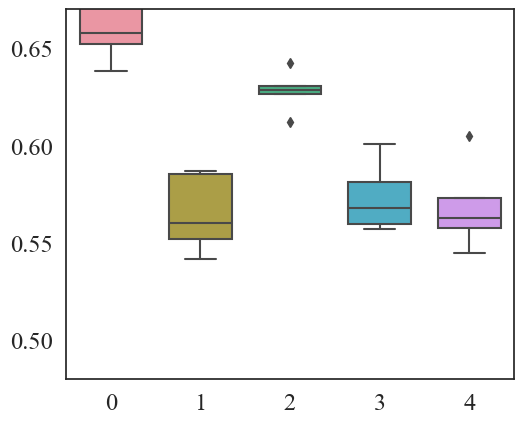

In [61]:
plot_bar(static_data_all)